In [ ]:
#Importamos libreria Pandas
import pandas as pd
datos = pd.read_csv("housing.csv")

In [ ]:
#Conocer la informacion/metadatos del set
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#Analizar la informacion - Numerico-Cuantitativo
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
datos_na = datos.dropna()

In [ ]:
dummies = pd.get_dummies(datos_na["ocean_proximity"], dtype=int)

In [ ]:
#Reemplazamos al Set actualizado las nuevas columnas (Dummies)
datos_na = datos_na.join(dummies)

In [ ]:
#Reemplazar al set de datos actualizado
datos_na = datos_na.drop(["ocean_proximity"], axis=1)

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

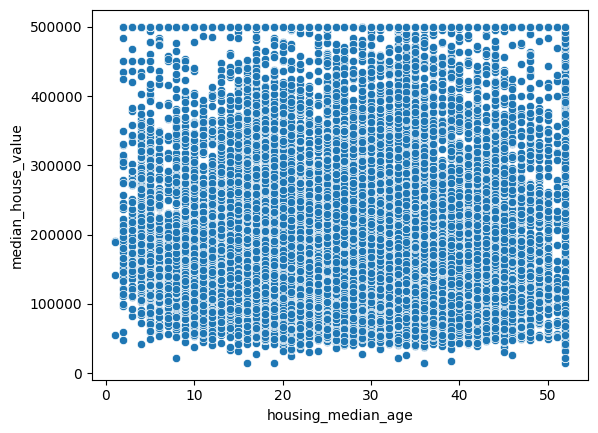

In [ ]:
import seaborn as sb
sb.scatterplot(x=datos_na["housing_median_age"], y=datos_na["median_house_value"])

In [ ]:
#Mostrar los datos mayores de 50 en median age, los menores de 500 mil y los menores de 15 mil en ingreso
datos_clean=datos_na[datos_na["housing_median_age"]<50]
datos_clean=datos_clean[datos_clean["median_house_value"]<500000]
datos_clean=datos_clean[datos_clean["median_income"]<15]


In [ ]:
datos_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.000000,18195.00000,18195.000000,18195.000000,18195.000000,18195.000000
mean,-119.478469,35.589778,26.757021,2678.415499,549.407859,1474.617367,509.890300,3.698224,189245.968508,0.44875,0.343611,0.000110,0.082440,0.125089
std,1.979162,2.148169,11.267991,2235.553359,430.854654,1167.572934,390.828534,1.565775,95255.885596,0.49738,0.474926,0.010484,0.275042,0.330829
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,-121.530000,33.920000,17.000000,1461.000000,300.000000,814.000000,284.000000,2.541100,115300.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,-118.450000,34.240000,27.000000,2146.000000,443.000000,1208.000000,416.000000,3.478400,171200.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,-117.970000,37.670000,36.000000,3191.500000,660.000000,1784.000000,615.000000,4.625000,242850.000000,1.00000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,49.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.147700,499100.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Separar las caracteristicas de la etiqueta
x = datos_clean.drop(["median_house_value"], axis=1)
y = datos_clean["median_house_value"]

In [ ]:
#Separar los datos en 2 partes: Conjunto de Entrenamiento - Conjunto de Pruebas
from sklearn.model_selection  import train_test_split
 #80% - Entrena  -  20% - Pruebas
x_ent, x_pru, y_ent, y_pru = train_test_split(x, y, test_size=.2)

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [ ]:
modelo.fit(x_ent, y_ent)

LinearRegression()

In [ ]:
predicciones = modelo.predict(x_pru)

In [ ]:
comparativa = {"Prediccion": predicciones, "Precio real": y_pru}
pd.DataFrame(comparativa)

,Prediccion,Precio real
16795,259084.862241,276200.0
5530,314111.388885,365900.0
3050,96233.738835,58800.0
18603,357513.862988,273900.0
12940,205296.946205,258700.0
...,...,...
13194,140586.595524,128200.0
10815,291642.456349,381500.0
16944,287581.287389,369700.0
8014,249415.474377,225800.0


In [ ]:
#Sobreajuste - Overfitting
print(modelo.score(x_ent, y_ent))
print(modelo.score(x_pru, y_pru))

0.6300699084146717
0.6141781372312299


<Axes: xlabel='median_house_value', ylabel='median_income'>

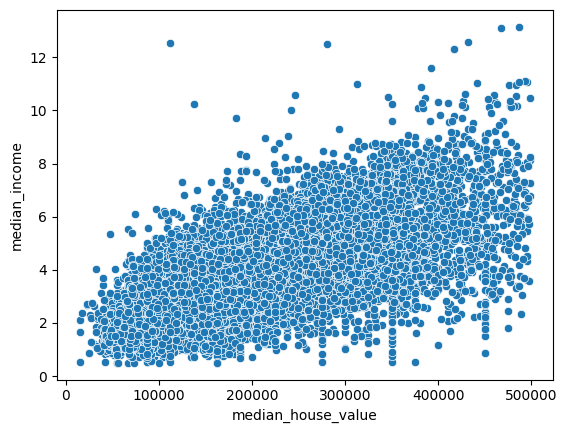

In [ ]:
sb.scatterplot(x=datos_clean["median_house_value"], y=datos_clean["median_income"])

<Axes: xlabel='median_house_value', ylabel='housing_median_age'>

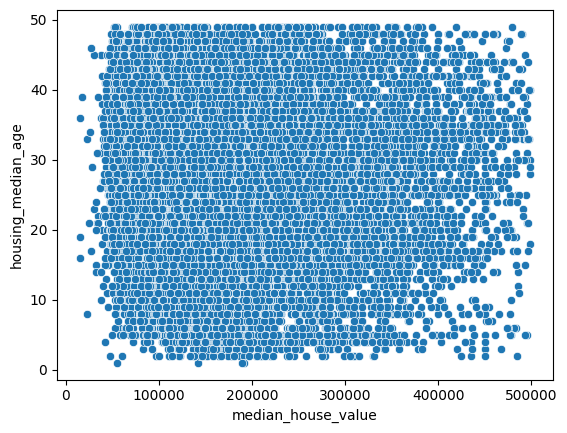

In [ ]:
sb.scatterplot(x=datos_clean["median_house_value"], y=datos_clean["housing_median_age"])


In [ ]:
#Error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_pru, predicciones)

In [ ]:
mse

3569036707.2882857

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

59741.41534386582

In [ ]:
#Scaler - Escalamiento
#Tener los datos en un rango mas pequeño
#Cuando se escalan los datos solamente se hace para las caracteristicas

In [ ]:
datos_na.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_ent_esc = scaler.fit_transform(x_ent)
x_pru_esc = scaler.fit_transform(x_pru)

In [ ]:
x_ent

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2302,-119.78,36.83,18.0,4164.0,741.0,1817.0,681.0,4.2153,0,1,0,0,0
2814,-119.05,35.42,41.0,1992.0,421.0,1006.0,419.0,2.8393,0,1,0,0,0
6721,-118.14,34.13,16.0,3569.0,821.0,1505.0,783.0,4.9167,1,0,0,0,0
20452,-118.81,34.28,20.0,3678.0,684.0,1882.0,694.0,4.1607,1,0,0,0,0
1845,-122.28,37.90,49.0,3191.0,516.0,1148.0,507.0,6.3538,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,0,1,0,0,0
1691,-122.24,38.01,16.0,2084.0,315.0,1154.0,307.0,6.0102,0,0,0,1,0
13003,-121.27,38.67,15.0,2116.0,524.0,866.0,519.0,2.7388,0,1,0,0,0
14776,-117.08,32.58,22.0,2128.0,477.0,1420.0,450.0,3.2687,0,0,0,0,1


In [ ]:
pd.DataFrame(x_ent_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.149670,0.578460,-0.778426,0.654883,0.440655,0.286362,0.433823,0.327485,-0.900124,1.380358,-0.011723,-0.300017,-0.378854
1,0.219355,-0.080237,1.273619,-0.304863,-0.295690,-0.396136,-0.231258,-0.549116,-0.900124,1.380358,-0.011723,-0.300017,-0.378854
2,0.679373,-0.682874,-0.956864,0.391969,0.624741,0.023798,0.692747,0.774323,1.110958,-0.724450,-0.011723,-0.300017,-0.378854
3,0.340679,-0.612800,-0.599987,0.440133,0.309493,0.341063,0.466823,0.292702,1.110958,-0.724450,-0.011723,-0.300017,-0.378854
4,-1.413456,1.078322,1.987373,0.224942,-0.077088,-0.276636,-0.007872,1.689849,-0.900124,-0.724450,-0.011723,3.333139,-0.378854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14551,2.468893,-0.355861,1.719715,-0.523590,-0.553411,-0.580436,-0.606952,-0.962253,-0.900124,1.380358,-0.011723,-0.300017,-0.378854
14552,-1.393235,1.129709,-0.956864,-0.264211,-0.539604,-0.271586,-0.515567,1.470954,-0.900124,-0.724450,-0.011723,3.333139,-0.378854
14553,-0.902886,1.438035,-1.046084,-0.250071,-0.058679,-0.513953,0.022590,-0.613141,-0.900124,1.380358,-0.011723,-0.300017,-0.378854
14554,1.215218,-1.406973,-0.421548,-0.244769,-0.166830,-0.047734,-0.152565,-0.275561,-0.900124,-0.724450,-0.011723,-0.300017,2.639538


In [ ]:
#El error disminuye pero no significativamente
